In [1]:
#inspect_stock_data.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#23 January 2018
#
#this reads some NYSE data and makes some charts

In [2]:
#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
pd.set_option('display.max_columns', None)

In [3]:
#select date ranges, for plotting and for models
data_date_range  = ('2016-01-01', '2018-01-12')
plot_date_range  = ('2016-03-01', '2018-01-12')
model_date_range = ('2017-01-12', '2018-01-12')

In [4]:
#read NYSE data
from helper_fns import *
data_path = 'data'
drop_holidays=True
market = read_nyse_data(data_path, start_date=data_date_range[0], end_date=data_date_range[1],
    drop_holidays=drop_holidays)
print market.dtypes
market.head(5)

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
vol                int64
dtype: object


,ticker,date,open,high,low,close,vol
1910462,A,2016-01-04,41.06,41.19,40.34,40.69,3287300
1910463,AA,2016-01-04,28.56,29.40,28.35,29.13,37919300
1910464,AAC,2016-01-04,18.88,18.95,18.07,18.52,119600
1910465,AAN,2016-01-04,22.11,22.77,21.95,22.68,698600
1910466,AAP,2016-01-04,149.25,154.48,147.51,152.24,1935300


In [5]:
#compute volume of shares traded each day
daily_volume = market.groupby('date')['vol'].sum()

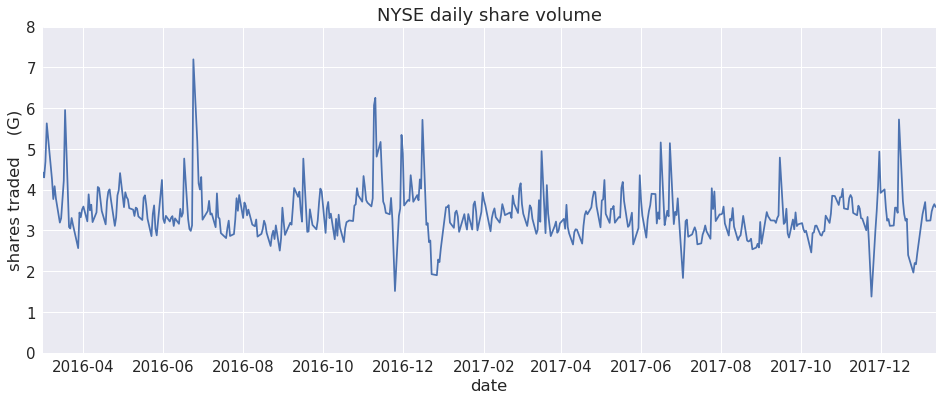

In [6]:
#plot daily volume vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = daily_volume.index
yp = daily_volume.values/1.0e9
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE daily share volume')
ax.set_xlabel('date')
ax.set_ylabel('shares traded    (G)')
ax.set_ylim(0, 8)
ax.set_xlim(plot_date_range)
plt.savefig('figs/volume.png')

In [7]:
#compute volume-weighted share price versus date
def volume_weighted_share_price(record):
    vwsp = None
    cv = record['close']*record['vol']
    v_total = record['vol'].sum()
    if (v_total > 0.0):
        vwsp = cv.sum()/v_total
    return vwsp
vwsp = market.groupby('date').apply(volume_weighted_share_price)

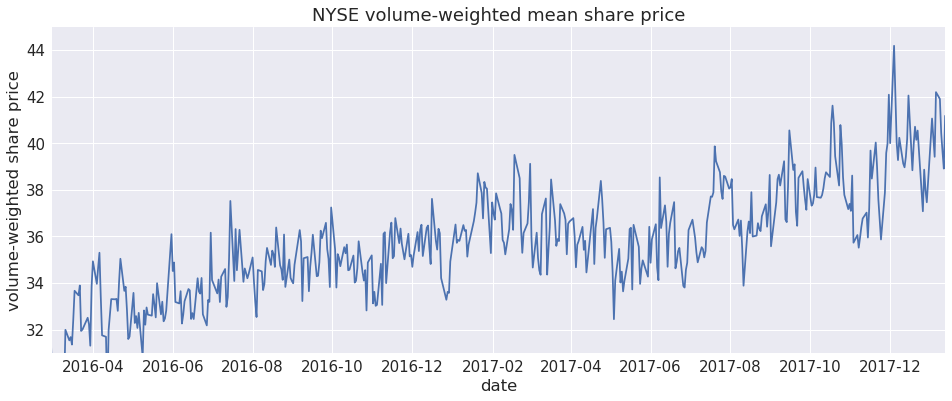

In [8]:
#plot volume-weighted share price vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = vwsp.index
yp = vwsp.values
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE volume-weighted mean share price')
ax.set_xlabel('date')
ax.set_ylabel('volume-weighted share price')
ax.set_ylim(31, 45)
ax.set_xlim(plot_date_range)
plt.savefig('figs/vwsp.png')

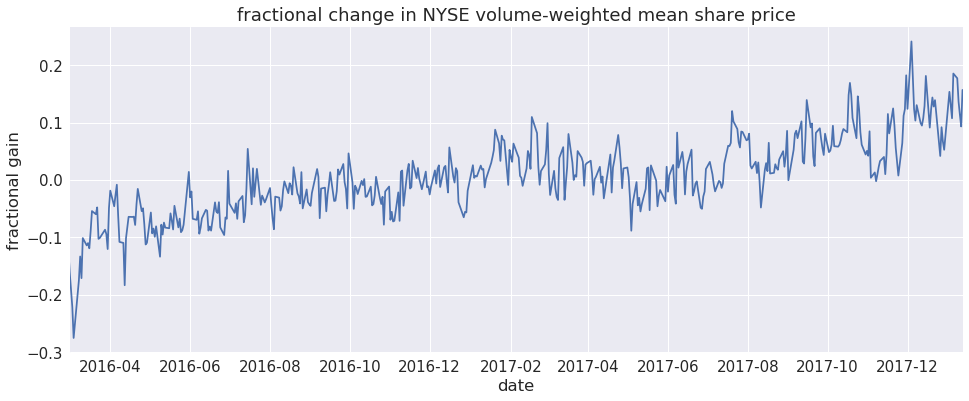

In [22]:
#plot fractional volume-weighted gain vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = vwsp.index
yp = vwsp.values
yp = (yp - yp[0])/yp[0]
p = ax.plot(xp, yp, linestyle='-')
p = ax.set_title('fractional change in NYSE volume-weighted mean share price')
p = ax.set_xlabel('date')
p = ax.set_ylabel('fractional gain')
p = ax.set_xlim(plot_date_range)
plt.savefig('figs/fractional_vwsp.png')

In [9]:
#simulate mean outcome for 25 people, each trading $10K worth of randomly selected tickers daily
N_buyers = 25
N_tickers = 5
initial_dollars = 10000.0
idx = (market['date'] >= model_date_range[0]) & (market['date'] <= model_date_range[1])
market_data = market[idx]
ran_purchases = random_purchases(market_data, N_buyers, N_tickers, initial_dollars)

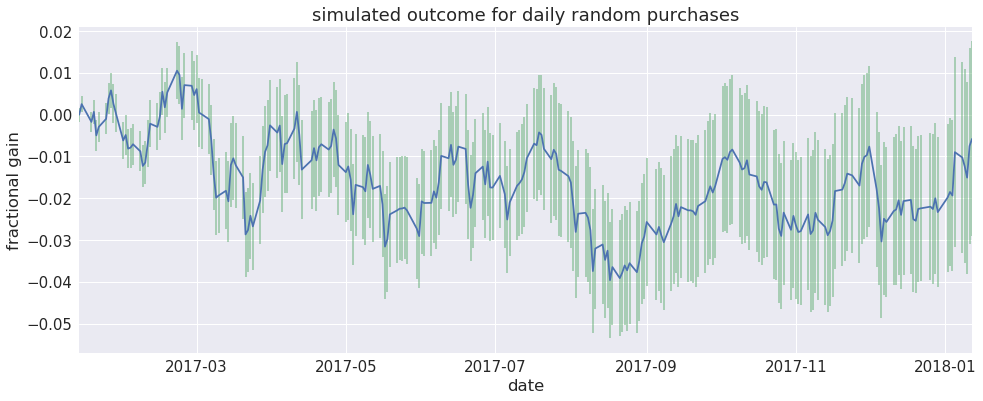

In [10]:
#plot mean fractional gain exhibited by random purchasers
fig, ax = plt.subplots(figsize=(16, 6))
xp = ran_purchases.index.values
yp = ran_purchases['dollars_mean'].values
err = ran_purchases['dollars_std'].values/yp[0]
yp = (yp -yp[0])/yp[0]
p = ax.plot(xp, yp, linestyle='-')
p = ax.errorbar(xp, yp, err, linestyle='none', alpha=0.5)
ax.set_title('simulated outcome for daily random purchases')
ax.set_xlabel('date')
ax.set_ylabel('fractional gain')
ax.set_xlim(model_date_range)
plt.savefig('figs/random_purchases.png')